# APAlala() aplicado al estudio de los medios de comunicación.
### Análisis de la frecuencia de la palabra crisis
##### A través del web scraping con Python podemos obtener los artículos que publican los medios gráficos para analizarlos a través de las herramientas del análisis estadístico y la vectorización de palabras. APAlala es un código que hace el web scraping de las páginas de periódicos de Argentina almacenando los artículos en un dataframe y en el ordenador.

In [1]:
class APAlala:
    def __init__(self, pagina_web, user_agent):
        self.pweb=pagina_web
        self.usag=user_agent
        
    def sec_paper(self):
        #Ingresando la dirección del diario y el user_agent del usuario como texto
        #devuelve las secciones con las que cuenta esa web
        import urllib
        from bs4 import BeautifulSoup
        import pandas as pd
        import numpy as np
        from urllib.error import HTTPError
        import re
        arr_ppr = []
        headers = {}
        headers['User-Agent'] = self.usag
        page = self.pweb
        page_paper = urllib.request.Request(page, headers=headers)
        page_paper_req = urllib.request.urlopen(page_paper).read().decode('utf-8')
        soup_ppr = BeautifulSoup(page_paper_req, 'lxml')
        ul_class_ppr=soup_ppr.find_all('ul')
        for i in range(len(ul_class_ppr)):
            dir_sppr = ul_class_ppr[i]
            for link in dir_sppr.find_all('a'):
                arr_ppr = np.append(arr_ppr, link.get('href'))
    
        arr_pp_app = []
        arr_pp_s = pd.Series(arr_ppr)
        arr_pp_s.dropna(inplace=True)
        arr_pp_s.reset_index(drop=True, inplace=True)
       
        for i in range(len(arr_pp_s)):
            arr_split = arr_pp_s[i].split(page)[-1]
            arr_pp_app = np.append(arr_pp_app, arr_split)
         
        dir_tabl = pd.DataFrame({'Secciones' : arr_pp_app,
                                 'Direcciones' : arr_pp_s})

        indices = []
        for i in range(len(dir_tabl['Secciones'])):
            try:
                if re.search(r'\.ar$|.ar/$', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
                elif re.search(r'\.com$|com/', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
                elif re.search(r'^http', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
                elif re.search(r'#$', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
                elif re.search(r'html$', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
                elif re.search(r'^/suscr', dir_tabl['Secciones'].iloc[i]):
                    indices = np.append(indices, i)
            except IndexError:
                   pass
            
        dir_tabl.drop(indices, axis=0, inplace=True)
        dir_tabl.reset_index(drop=True, inplace=True)

        return print('Las secciones del diario son:', dir_tabl['Secciones'].unique())
         
    def argie_tablyzer(self, seccion):
        #Genera una tabla con nombre de diario, sección, título, texto de la noticia,
        #dificultad de lectura en número e interpretación, y fecha de acceso.
        import urllib
        from bs4 import BeautifulSoup
        import pandas as pd
        import numpy as np
        from urllib.error import HTTPError
        import re
        from legibilidad import legibilidad
        import datetime      
        
        seccion = seccion
        cant_art = 0
        arr_ppr = []
        headers = {}
        headers['User-Agent'] = self.usag
        page = self.pweb
        if False:
            try:
                page_paper = urllib.request.Request(page, headers=headers)
                page_paper_req = urllib.request.urlopen(page_paper).read().decode('utf-8')
                soup_ppr = BeautifulSoup(page_paper_req, 'lxml')
                ul_class_ppr=soup_ppr.find_all('ul')
                dir_sppr = ul_class_ppr[0]
                for link in dir_sppr.find_all('a'):
                    arr_ppr = np.append(arr_ppr, link.get('href'))
                arr_pp_app = []
                arr_pp_s = pd.Series(arr_ppr)
                arr_pp_s.dropna(inplace=True)
                arr_pp_s.reset_index(drop=True, inplace=True)
                for i in range(len(arr_pp_s)):
                    arr_split = arr_pp_s[i].split('/')
                    while '' in arr_split:
                        arr_split.remove('')
                    ultimo = arr_split[-1]
                    arr_pp_app = np.append(arr_pp_app, ultimo)
                dir_tabl = pd.DataFrame({'Secciones' : arr_pp_app,
                                         'Direcciones' : arr_pp_s})
            except IndexError:
                    pass
        
        else:
            page_paper = urllib.request.Request(page, headers=headers)
            page_paper_req = urllib.request.urlopen(page_paper).read().decode('utf-8')
            soup_ppr = BeautifulSoup(page_paper_req, 'lxml')
            ul_class_ppr=soup_ppr.find_all('ul')
            dir_sppr = ul_class_ppr[2]
            for link in dir_sppr.find_all('a'):
                arr_ppr = np.append(arr_ppr, link.get('href'))
            arr_pp_app = []
            arr_pp_s = pd.Series(arr_ppr)
            arr_pp_s.dropna(inplace=True)
            arr_pp_s.reset_index(drop=True, inplace=True)
            for i in range(len(arr_pp_s)):
                arr_split = arr_pp_s[i].split('/')
                while '' in arr_split:
                    arr_split.remove('')
                ultimo = arr_split[-1]
                arr_pp_app = np.append(arr_pp_app, ultimo)
            dir_tabl = pd.DataFrame({'Secciones' : arr_pp_app,
                                     'Direcciones' : arr_pp_s})
  
        sec = seccion
        for i in range(len(dir_tabl['Direcciones'])):
            if sec in dir_tabl['Secciones'][i]:
                sec = dir_tabl['Direcciones'][i]
                break

        item = pd.Series([page]+[sec])
        if item[0] not in item[1]:
            res_web=(pd.Series([page]+[sec])).sum()
        else:
            res_web=item[1]    
    
        headers = {}
        headers['User-Agent'] = self.usag
        html = res_web
        url = urllib.request.Request(html, headers=headers)
        url = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(url, 'lxml')
        dir_url = []
        for i in soup.find_all('a'):
            dir_url= np.append(dir_url, i.get('href'))
        dir_url = pd.Series(dir_url)
        paginas = pd.DataFrame({})
        paginas['Direcciones'] = dir_url
        paginas.dropna(inplace=True)
        paginas.reset_index(drop=True, inplace=True)
    
        urls=[]
        for sec in np.arange(len(paginas['Direcciones'])):
            urls = np.append(urls, paginas['Direcciones'].iloc[sec])
    
        urls = np.unique(urls)
        urls_res = []
        for i in range(len(urls)):
            if re.search(r"ar/+[0-9]", urls[i]):
                urls_res = np.append(urls_res, urls[i])
            elif '/'+seccion+'/' == urls[i]:
                np.delete(urls, [i])
            elif '/'+seccion == urls[i]:
                np.delete(urls, [i])
            elif re.search(r"^/[0-9]+-", urls[i]):
                urls_res = np.append(urls_res, urls[i])
            elif re.search(r'^'+seccion, urls[i]):
                urls_res = np.append(urls_res, urls[i])
            elif re.search(r'^/'+seccion, urls[i]):
                urls_res = np.append(urls_res, urls[i])
    
        todo_texto = []
        diff_text= []
        titulo_append = []
        texto_append = []
        interp = []
        for i in np.arange(len(urls_res)):
            try:
                if page in urls_res[i]:
                    busqueda = urls_res[i]
                elif seccion == urls_res[i]:
                    continue
                else:
                    busqueda = page+urls_res[i]
                html_def = busqueda
                url_def = urllib.request.Request(html_def, headers=headers)
                url_def = urllib.request.urlopen(url_def).read()
                soup_def = BeautifulSoup(url_def)
                titulo_def = soup_def.find('title')
                cant_art = cant_art +1
                articulo_def = soup_def.find_all('p')
                art_def_text=[re.sub(r'\<.+?>|[\n]|[\r]',r'',str(a)) for a in articulo_def]
                cuenta= []
                for i in range(len(art_def_text)):
                    cuenta = np.append(cuenta, len(art_def_text[i]))
                defin = []
                for i in np.arange(len(art_def_text)):
                    if len(art_def_text[i])>(cuenta.mean()+40):
                        defin= np.append(defin, art_def_text[i])
                art_def_text = (pd.Series(defin)).sum()
                art_def_text = art_def_text.replace('\xa0', ' ')
                if 'Recibir newsletter' in art_def_text:
                    art_def_text = art_def_text.replace('Recibir newsletter', ' ')
                ln_comentario = 'Los comentarios publicados son de exclusiva responsabilidad de sus autores y las consecuencias derivadas de ellos pueden ser pasibles de sanciones legales. Aquel usuario que incluya en sus mensajes algún comentario violatorio del reglamento será eliminado e inhabilitado para volver a comentar. Enviar un comentario implica la aceptación del Reglamento.'
                #ln_comentario es una variable que contiene un texto que se muestra en las notas del diario "La Nación". Buscamos filtrarlo
                if ln_comentario in art_def_text:
                    art_def_text = art_def_text.replace(ln_comentario, '.')
                if '.' in art_def_text:
                    if '.' != '. ':
                        art_def_text = art_def_text.replace('.', '. ')
                titulo_def = re.sub(r'\<title>|\</title>|\n', r'', str(titulo_def))
                titulo_append = np.append(titulo_append, titulo_def)
                texto_append = np.append(texto_append, str(art_def_text))
                
            except (AttributeError, HTTPError):
                print('Imposible ejecutar sobre', busqueda, '\n')
                cant_art = cant_art - 1
                continue
            
            seccion_final = re.sub(r'/category/asuntos-publicos/|/$|/secciones/|^/', r'', seccion)
            diario = re.sub(r'^https://www\.|\.com|\.ar$', r'', page)
            diff_text = np.append(diff_text, legibilidad.szigriszt_pazos(art_def_text))
            interp = np.append(interp, str(legibilidad.interpretaP(legibilidad.szigriszt_pazos(art_def_text))))
             
        return pd.DataFrame({'diario' : diario,'url' : page, 'seccion' : seccion_final, 'título' : titulo_append,'texto' : texto_append,'dificultad' : diff_text,'interpretacion de dif' : interp, 'fecha de acceso': datetime.datetime.now()})
    
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    import string
    from collections import Counter
    
    def filtrador(text_1):
        import string
        import nltk
        {word:True for word in text_1}
        def build_bag_of_words_features(words):
            return {word:True for word in words}
        lista = ['¿' ,'¡', '""', "''",'“', '”', '``', '-', '–', '«', '»', '...']
        lista2 = ['así', 'si', 'sólo', 'modo', 'ción', 'unas', 'puede', 'menos', 'punto', 'caso', 'según', 'todas', 'ciento', 'vez', 'tal', 'condiciones©', 'pagina12', 'www', 'com', 'comment', 'clarín', 'clic', 'comentar', 'e-mail', '--']
        useless_words = nltk.corpus.stopwords.words("spanish") + list(string.punctuation) + list(string.digits) + lista + lista2
        filtered_words = [word for word in text_1 if not word in useless_words]
        return filtered_words
    
    def contador_bow(text_2):
        from collections import Counter
        filtered_words = APAlala.filtrador(text_2)
        word_counter = Counter(filtered_words)
        most_common_words = word_counter.most_common()[:]
        return most_common_words
    
    def que_palabras(texto, count=False):
        #Devuelve las palabras más mencionadas en el texto.
        #Puede ser Serie de textos o texto
        import nltk
        import string
        from itertools import chain
        if str(type(texto)) == "<class 'str'>":
            print(type(texto))
            t_words = nltk.word_tokenize(texto.lower())
            filtered = APAlala.filtrador(t_words)
            if count==False:
                return filtered
            else:
                countered = APAlala.contador_bow(t_words)
                return countered
        elif str(type(texto)) == "<class 'pandas.core.series.Series'>":
            print(type(texto))
            ta = []
            for i in range(len(texto)):
                t = texto[i]
                ta.append(nltk.word_tokenize(t.lower()))
            t_words = list(chain.from_iterable(ta))
            filtered = APAlala.filtrador(t_words)
            if count==False:
                return filtered
            else:
                countered = APAlala.contador_bow(t_words)
                return countered
    
    def que_onda(palabra_clave, columna, df, sentiment=False):
        #Realiza la búsqueda de una palabra en la Serie y devuelve las oraciones
        #en las que aparece esa palabra. 
        #El objetivo es ejecutar sentiment analysis; sin corpus para tal efecto,
        #experimentamos con TextBlob realizando traducción
        diario = []
        seccion = []
        titulo =[]
        oraciones = []
        p = []
        f = []
        sentiment_a= []
        import numpy as np
        import nltk.data
        import re
        from textblob import TextBlob, Word
        from textblob.sentiments import NaiveBayesAnalyzer
        tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
        for i in range(len(df)):
            texto = columna[i].lower()
            palabra_clave = palabra_clave.lower()
            for a in range(len(tokenizer.tokenize(texto))):
                if re.search(r''+palabra_clave+r'\b', tokenizer.tokenize(texto)[a]) and sentiment==False:
                    tb = tokenizer.tokenize(texto)[a]
                    oraciones = np.append(oraciones, [tb])
                    diario = np.append(diario, df['diario'][i])
                    seccion = np.append(seccion, df['seccion'][i])
                    titulo = np.append(titulo, df['título'][i])
                    f = np.append(f, df['fecha de acceso'][i])
                    p = np.append(p, palabra_clave)

                elif re.search(r''+palabra_clave+r'\b', tokenizer.tokenize(texto)[a]) and sentiment:
                    tb = TextBlob(tokenizer.tokenize(texto)[a])
                    tb_w = tb.translate(to='en')
                    tb_l = Word(tb_w)
                    tb_l = tb_l.lemmatize()
                    tb_l = str(tb_l)
                    tb_s = TextBlob(tb_l, analyzer=NaiveBayesAnalyzer())
                    sentiment_a = np.append(sentiment_a, tb_s.sentiment[0])
                    oraciones = np.append(oraciones, [tokenizer.tokenize(texto)[a]])
                    diario = np.append(diario, df['diario'][i])
                    seccion = np.append(seccion, df['seccion'][i])
                    titulo = np.append(titulo, df['título'][i])
                    f = np.append(f, df['fecha de acceso'][i])
                    p = np.append(p, palabra_clave)

        if sentiment==False:
            tabla = pd.DataFrame({'diario': diario,
                                  'seccion' : seccion,
                                  'titulo' : titulo,
                                  'oracion' : oraciones,
                                  'palabra buscada' : p,
                                  'fecha de acceso' : f})
        else:
            tabla = pd.DataFrame({'diario': diario,
                                  'seccion' : seccion,
                                  'titulo' : titulo,
                                  'oracion' : oraciones,
                                  'palabra buscada' : p,
                                  'fecha de acceso' : f,
                                  'sentiment': sentiment_a})
        return tabla
    
    
    def guarda_con_eso(path_file, df):
        #Guarda en el directorio especificado el archivo generado
        from pathlib import Path
        import os
        import pandas as pd
        path = Path(path_file)
        archivos = os.listdir(path)
        if len(archivos) == 0:
            nombre_archivo = str(input('Ingrese nombre para archivo:'))
            f = open(path/nombre_archivo, 'w+')
            df.to_csv(path/nombre_archivo, index=False)
        else:
            print(archivos)
            na = str(input('Seleccione archivo:'))
            f = pd.read_csv(path/na)
            f = pd.concat([f, df], axis=0)
            f.reset_index(drop=True, inplace=True)
            f.to_csv(path/na, index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mauricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mauricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def contar_crisis(tabla , palabra='crisis'):
    import nltk
    import re
    b=0
    c=[]
    for i in range(len(tabla)):
        t_words = nltk.word_tokenize(tabla['oracion'][i])
        a = [re.sub(r'^–|–$', '', t_words[word]) for word in range(len(t_words))]
        b=0
        for word in range(len(a)):
            if a[word]==palabra:
                b = b+1
        c.append(b)
    return c

In [3]:
def distancia_palabras(tabla_analisis, tabla_columnas,
                       dist_center=0, focus_p=False, 
                       focus_x=0, focus_y=0, x_f=0, y_f=0,
                       p_buscada=None, rela_p=None,
                       graf=False, size_x=8, size_y=8, perplexity=100,
                       su=False, euclidean=False, 
                       tsne_matrix=False, tabla_distancias=False):

#Vectoriza las palabras de los textos o documentos con TF-IDF y posteriormente reduce las dimensiones con t-SNE.
#Puede dar varios resultados de acuerdo al setting que requiramos: diagrama de dispersión (t-SNE), distancia euclideana
#o tabla de distancias.
    
    import nltk
    tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
    import string
    import pandas as pd
    import numpy as np
    lista3 = np.arange(0, 100000, 1)
    b = []
    for i in range(len(lista3)):
        a = str(lista3[i])
        b.append(a)
    lista = ['¿' ,'¡', '""', "''",'“', '”', '``', '-', '–', '«', '»', '...']
    lista2 = ['así', 'si', 'sólo', 'modo', 'ción', 'unas', 'puede', 'menos', 'punto', 'caso', 'según', 'todas', 'ciento', 'vez', 'tal', 'condiciones©', 'pagina12', 'www', 'com', 'comment', 'clarín', 'clic', 'comentar', 'e-mail', '--']
    lista4 = ['00', '000','003','005','01','012','013','015','016','02','05','055','06','067','079','08','087','09','096','1º','2016el','2022quienes','288218','3g','3rvpxzlp0qel','4347221','4g','50º','5g','7up', '0002','0006','0008','0043','0054','027','0385','043','050','065','097','0nw9u7i48i','11º','1799997','2º','35a','4billones','5º','9º', '006','010','020','021','024','029','03','031','0365','04','047','07','071','0810','083','089','099','1o','1ª','2o','3d','3er','3ro','50012415','50el','5ta','5to','a2','a24','a2j9','a2m2','a4','a7','aa19', '022','025','030','0389','057','070','075','078','0km','150ml','1552056808871','21f','32avos','36c7','8m']
    useless_words = nltk.corpus.stopwords.words("spanish") + list(string.punctuation) + list(string.digits) + lista + lista4 + b
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfid =  TfidfVectorizer(stop_words = useless_words, analyzer='word')
    x_text_tfid = tfid.fit_transform(tabla_analisis)
    
    df = pd.DataFrame(x_text_tfid.toarray(), columns = tfid.get_feature_names())
    df_t = df.T
    df_t.columns = tabla_columnas
    
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = perplexity)
    tsne_dts = tsne.fit_transform(df_t)
    if su:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        tsne_dts=scaler.fit_transform(tsne_dts)
    

    texts = []
    crisis_text=[]
    rela_p_text=[]
    if p_buscada != None:
        for i in range(len(df_t.index)):
            if df_t.index[i] == p_buscada:
                crisis = df_t.index[i]
                x, y = tsne_dts[i, 0], tsne_dts[i, 1]
    
    if rela_p != None:
        for i in range(len(df_t.index)):
            if df_t.index[i] == rela_p:
                rela_pp = df_t.index[i]
                rela_px, rela_py = tsne_dts[i, 0], tsne_dts[i, 1]
    
    a=[]
    b=[]
    c=[]
    if focus_p == False:
        for i in range(len(tsne_dts)):
            if (((((tsne_dts[i, 0] >= x) and (tsne_dts[i, 0] <= x+dist_center)) or ((tsne_dts[i, 0] <= x) and (tsne_dts[i, 0] >= x-dist_center)))) and ((((tsne_dts[i, 1] >= y) and (tsne_dts[i, 1] <=y+dist_center)) or ((tsne_dts[i, 1] <= y) and (tsne_dts[i, 1] >=y-dist_center))))):
                a.append(df_t.index[i])
                b.append(tsne_dts[i, 0])
                c.append(tsne_dts[i, 1])
    elif focus_p:
        for i in range(len(tsne_dts)):
            if (((((tsne_dts[i, 0] >= focus_x) and (tsne_dts[i, 0] <= focus_x+x_f)) or ((tsne_dts[i, 0] <= focus_x) and (tsne_dts[i, 0] >= focus_x-x_f)))) and ((((tsne_dts[i, 1] >= focus_y) and (tsne_dts[i, 1] <=focus_y+y_f)) or ((tsne_dts[i, 1] <= focus_y) and (tsne_dts[i, 1] >=focus_y-y_f))))):
                    a.append(df_t.index[i])
                    b.append(tsne_dts[i, 0])
                    c.append(tsne_dts[i, 1])
           
    tabla = pd.DataFrame({'palabra' : a,
                                  'x' : b,
                                  'y' : c})
    de_l = []
    if p_buscada != None:
        for i in range(len(tabla)):
            d_e= np.sqrt((x-tabla['x'][i])**2 + (y-tabla['y'][i])**2)
            de_l.append(d_e)
        tabla['distancias'] = de_l
    
    tabla.reset_index(inplace=True, drop=True)
    
    
    if graf:
        import numpy as np
        import seaborn as sns
        import matplotlib.pyplot as plt
        from adjustText import adjust_text
        sns.set()
        fig, ax = plt.subplots(figsize = (size_x, size_y))

        sns.scatterplot(tsne_dts[:, 0], tsne_dts[:, 1], alpha = 0.5)
        words_to_plot = list(np.arange(0, len(tabla), 1))

        for i in words_to_plot:
            texts.append(plt.text(tabla['x'][i], tabla['y'][i], tabla['palabra'][i], fontsize = 12))

        adjust_text(texts, force_points = 0.4, force_text = 0.4, 
                    expand_points = (2,1), expand_text = (1,2),
                    arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))
        
        if p_buscada != None:
            crisis_text.append(plt.text(x, y, crisis, fontsize=20, color='red'))
            adjust_text(crisis_text, force_points = 0.4, force_text = 0.4, 
                        expand_points = (2,1), expand_text = (1,2),
                        arrowprops = dict(arrowstyle = "-", color = 'red', lw = 0.5))
        
        if rela_p != None:
            rela_p_text.append(plt.text(rela_px, rela_py, rela_pp, fontsize=20, color='green'))
            adjust_text(rela_p_text, force_points = 0.4, force_text = 0.4, 
                    expand_points = (2,1), expand_text = (1,2),
                    arrowprops = dict(arrowstyle = "-", color = 'green', lw = 0.5))
    
        plt.show()
    try:
        coord_p = [x, y]
        coord_rp= [rela_px, rela_py]
    except UnboundLocalError:
        pass
    if euclidean:
        import numpy as np
        euc = np.sqrt((coord_p[0]-coord_rp[0])**2 + (coord_p[1]-coord_rp[1])**2)
    if (tsne_matrix == False) and (tabla_distancias == False):
        try:
            return print('Palabra buscada:', p_buscada, coord_p,
                         '\nPalabra relacionada:', rela_p, coord_rp,
                         '\nDistancia euclideana:',p_buscada,'~', rela_p, euc)
        except UnboundLocalError:
            pass
    elif tsne_matrix and (tabla_distancias == False):
        return tsne_dts
    if tabla_distancias:
        return tabla.sort_values('distancias', ascending=True)

In [4]:
#Para leer la nota de Infobae
def infobae_20_feb(nota_cerca_max_hist):
    from bs4 import BeautifulSoup
    import re
    nota_cerca_max_hist_def = urllib.request.Request(nota_cerca_max_hist)
    nota_cerca_max_hist_def = urllib.request.urlopen(nota_cerca_max_hist_def).read()
    soup_def = BeautifulSoup(nota_cerca_max_hist_def)
    titulo_def = soup_def.find('title')
    articulo_def = soup_def.find_all('p')
    art_def_text=[re.sub(r'\<.+?>|[\n]|[\r]',r'',str(a)) for a in articulo_def]
    cuenta= []
    for i in range(len(art_def_text)):
        cuenta = np.append(cuenta, len(art_def_text[i]))
    defin = []
    for i in np.arange(len(art_def_text)):
        if len(art_def_text[i])>(cuenta.mean()+40):
            defin= np.append(defin, art_def_text[i])
    art_def_text = (pd.Series(defin)).sum()
    art_def_text = art_def_text.replace('\xa0', ' ')
    if 'Recibir newsletter' in art_def_text:
        art_def_text = art_def_text.replace('Recibir newsletter', ' ')
    titulo_def = re.sub(r'\<title>|\</title>|\n', r'', str(titulo_def))
    return titulo_def, art_def_text

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [6]:
d = ['pagina12', 'clarin', 'lanacion', 'pausa', 'infobae','iprofesional']

In [30]:
#tabla_diarios_web_scraping = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\diarios web\diarios_dataset\p_diarios_febrero.csv', sep=',')
#crisis_diarios = APAlala.que_onda('crisis', tabla_diarios_web_scraping['texto'], tabla_diarios_web_scraping)
#crisis_diarios.to_csv('crisis en los diarios original.csv', sep=';')

In [31]:
#crisis_diarios.to_csv('crisis en los diarios original 2.csv', sep=';')

##### Comenzamos el análisis de los datos cargando el dataframe generado con "APAlala!". A partir de este punto, realizarmos diferentes operaciones a la tabla extrayendo los datos requeridos y creando nuevas tablas para realizar los análisis de los datos.

In [76]:
crisis_tabla_original = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\crisis en los diarios original 3 8.csv', sep=';')
crisis_tabla= crisis_tabla_original.drop_duplicates('oracion')
crisis_tabla.reset_index(inplace=True, drop=True)

In [77]:
crisis_pausa = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'pausa'], crisis_tabla[crisis_tabla['diario'] == 'https://www.pausa']])
crisis_clarin = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'clarin'], crisis_tabla[crisis_tabla['diario'] == 'https://www.clarin']])
crisis_lanacion = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'lanacion'], crisis_tabla[crisis_tabla['diario'] == 'https://www.lanacion']])
crisis_p12 = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'pagina12'], crisis_tabla[crisis_tabla['diario'] == 'https://www.pagina12']])
crisis_infobae = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'infobae'], crisis_tabla[crisis_tabla['diario'] == 'https://www.infobae']])
crisis_iprof = pd.concat([crisis_tabla[crisis_tabla['diario'] == 'iprofesional'], crisis_tabla[crisis_tabla['diario'] == 'https://www.iprofesional']])
crisis_pausa.reset_index(inplace=True, drop=True)
crisis_pausa.drop('Unnamed: 0', axis=1, inplace=True)
crisis_clarin.reset_index(inplace=True, drop=True)
crisis_clarin.drop('Unnamed: 0', axis=1, inplace=True)
crisis_lanacion.reset_index(inplace=True, drop=True)
crisis_lanacion.drop('Unnamed: 0', axis=1, inplace=True)
crisis_p12.reset_index(inplace=True, drop=True)
crisis_p12.drop('Unnamed: 0', axis=1, inplace=True)
crisis_infobae.reset_index(inplace=True, drop=True)
crisis_infobae.drop('Unnamed: 0', axis=1, inplace=True)
crisis_iprof.reset_index(inplace=True, drop=True)
crisis_iprof.drop('Unnamed: 0', axis=1, inplace=True)


#crisis_pausa.to_csv('crisis pausa.csv', sep=';')
#crisis_clarin.to_csv('crisis clarin.csv', sep=';')
#crisis_lanacion.to_csv('crisis lanacion.csv', sep=';')
#crisis_p12.to_csv('crisis p12.csv', sep=';')
#crisis_infobae.to_csv('crisis infobae.csv', sep=';')
#crisis_iprofesional.to_csv('crisis iprof.csv', sep=';')

#crisis_pausa = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis pausa.csv', sep=';')
#crisis_clarin = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis clarin.csv', sep=';')
#crisis_lanacion = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis lanacion.csv', sep=';')
#crisis_infobae = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis infobae.csv', sep=';')
#crisis_p12 = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis p12.csv', sep=';')
#crisis_iprof = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis iprof.csv', sep=';')


crisis_clarin_ec_pol = crisis_clarin.drop_duplicates('titulo', keep='first')
crisis_lnacion_ec_pol = crisis_lanacion.drop_duplicates('titulo', keep='first')
crisis_p12_ec_pol = crisis_p12.drop_duplicates('titulo', keep='first')
crisis_infobae_ec_pol = crisis_infobae.drop_duplicates('titulo', keep='first')
crisis_iprof_ec_pol = crisis_iprof.drop_duplicates('titulo', keep='first')
crisis_pausa_ec_pol = crisis_pausa.drop_duplicates('titulo', keep='first')

crisis_art_pal_diarios = pd.DataFrame({'diario' : d,
                                       'articulos crisis' : [len(crisis_p12_ec_pol), len(crisis_clarin_ec_pol), len(crisis_lnacion_ec_pol), len(crisis_pausa_ec_pol), len(crisis_infobae_ec_pol), len(crisis_iprof_ec_pol)],
                                       'economia crisis' : [len(crisis_p12_ec_pol[crisis_p12_ec_pol['seccion'] == 'economia']),len(crisis_clarin_ec_pol[crisis_clarin_ec_pol['seccion'] == 'economia']),len(crisis_lnacion_ec_pol[crisis_lnacion_ec_pol['seccion'] == 'economia']),len(crisis_pausa_ec_pol[crisis_pausa_ec_pol['seccion'] == 'economia']),len(crisis_infobae_ec_pol[crisis_infobae_ec_pol['seccion'] == 'economia']),len(crisis_iprof_ec_pol[crisis_iprof_ec_pol['seccion'] == 'economia'])],
                                       'politica crisis' : [len(crisis_p12_ec_pol[crisis_p12_ec_pol['seccion'] == 'el-pais']), len(crisis_clarin_ec_pol[crisis_clarin_ec_pol['seccion'] == 'politica']),len(crisis_lnacion_ec_pol[crisis_lnacion_ec_pol['seccion'] == 'politica']),len(crisis_pausa_ec_pol[crisis_pausa_ec_pol['seccion'] == 'politica']),len(crisis_infobae_ec_pol[crisis_infobae_ec_pol['seccion'] == 'politica']),len(crisis_iprof_ec_pol[crisis_iprof_ec_pol['seccion'] == 'politica'])]})

#crisis_art_pal_diarios.to_csv('crisis count.csv', sep=';')

In [78]:
crisis_pausa_lista = APAlala.que_palabras(crisis_pausa['oracion'], count=True)[:20]
crisis_clarin_lista = APAlala.que_palabras(crisis_clarin['oracion'], count=True)[:20]
crisis_lanacion_lista = APAlala.que_palabras(crisis_lanacion['oracion'], count=True)[:20]
crisis_infobae_lista = APAlala.que_palabras(crisis_infobae['oracion'], count=True)[:20]
crisis_p12_lista = APAlala.que_palabras(crisis_p12['oracion'], count=True)[:20]
crisis_iprof_lista = APAlala.que_palabras(crisis_iprof['oracion'], count=True)[:20]

lista_palabras_crisisdiarios = pd.DataFrame({'Pausa' : crisis_pausa_lista,
                                             'Clarín' : crisis_clarin_lista,
                                             'Página|12' : crisis_p12_lista,
                                             'La Nación' : crisis_lanacion_lista,
                                             'Infobae' : crisis_infobae_lista,
                                             'Iprofesional' : crisis_iprof_lista})

#lista_palabras_crisisdiarios.to_csv('20 palabras con crisis en los diarios.csv', sep=';')

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [79]:
crisis_count = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\crisis count.csv', sep=';')
crisis_count['crisis count'] = [crisis_p12_lista[0][1], crisis_clarin_lista[0][1], crisis_lanacion_lista[0][1], crisis_pausa_lista[0][1], crisis_infobae_lista[0][1],crisis_iprof_lista[0][1]  ]
crisis_count['crisis relativa'] = round((crisis_count['crisis count'])/crisis_count['articulos crisis'], 2)
crisis_count['economia % articulos'] =round(crisis_count['economia crisis']*100/crisis_count['articulos crisis'],2)
crisis_count['politica % articulos'] =round(crisis_count['politica crisis']*100/crisis_count['articulos crisis'],2)
crisis_count.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_count.to_csv('crisis count v2.csv', sep=';')

In [80]:
fecha_pausa = pd.to_datetime(crisis_pausa['fecha de acceso'])
fecha_clarin = pd.to_datetime(crisis_clarin['fecha de acceso'])
fecha_lanacion = pd.to_datetime(crisis_lanacion['fecha de acceso'])
fecha_infobae = pd.to_datetime(crisis_infobae['fecha de acceso'])
fecha_p12 = pd.to_datetime(crisis_p12['fecha de acceso'])
fecha_iprof = pd.to_datetime(crisis_iprof['fecha de acceso'])

crisis_pausa['fecha datetime'] = fecha_pausa
crisis_clarin['fecha datetime'] = fecha_clarin
crisis_lanacion['fecha datetime'] = fecha_lanacion
crisis_infobae['fecha datetime'] = fecha_infobae
crisis_p12['fecha datetime'] = fecha_p12
crisis_iprof['fecha datetime'] = fecha_iprof

crisis_contada_pausa = contar_crisis(crisis_pausa)
crisis_contada_clarin = contar_crisis(crisis_clarin)
crisis_contada_lanacion = contar_crisis(crisis_lanacion)
crisis_contada_infobae = contar_crisis(crisis_infobae)
crisis_contada_p12 = contar_crisis(crisis_p12)
crisis_contada_iprof = contar_crisis(crisis_iprof)

crisis_pausa['crisis count'] = crisis_contada_pausa
crisis_clarin['crisis count'] = crisis_contada_clarin
crisis_lanacion['crisis count'] = crisis_contada_lanacion
crisis_infobae['crisis count'] = crisis_contada_infobae
crisis_p12['crisis count'] = crisis_contada_p12
crisis_iprof['crisis count'] = crisis_contada_iprof

In [81]:
crisis_tabla['crisis cuenta'] = contar_crisis(crisis_tabla)
fecha = pd.to_datetime(crisis_tabla['fecha de acceso'])
crisis_tabla['fecha datetime'] = fecha
crisis_tabla.drop('Unnamed: 0', axis=1, inplace=True)
crisis_tiempo = crisis_tabla.groupby([crisis_tabla['fecha datetime'].dt.date]).sum()

In [82]:
crisis_tiempo_pausa = crisis_pausa.groupby([crisis_pausa['fecha datetime'].dt.date]).sum()
crisis_tiempo_clarin = crisis_clarin.groupby([crisis_clarin['fecha datetime'].dt.date]).sum()
crisis_tiempo_p12 = crisis_p12.groupby([crisis_p12['fecha datetime'].dt.date]).sum()
crisis_tiempo_lanacion = crisis_lanacion.groupby([crisis_lanacion['fecha datetime'].dt.date]).sum()
crisis_tiempo_infobae = crisis_infobae.groupby([crisis_infobae['fecha datetime'].dt.date]).sum()
crisis_tiempo_iprof = crisis_iprof.groupby([crisis_iprof['fecha datetime'].dt.date]).sum()

#crisis_tiempo_pausa.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_tiempo_clarin.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_tiempo_p12.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_tiempo_lanacion.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_tiempo_infobae.drop('Unnamed: 0', axis=1, inplace=True)
#crisis_tiempo_iprof.drop('Unnamed: 0', axis=1, inplace=True)

In [83]:
#Cargamos el dataset del tipo de cambio Peso-USD 
dolar = urllib.request.urlopen('http://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv')
dolar_csv = pd.read_csv(dolar)
dolar_tc = dolar_csv.iloc[:, 0:3]
dolar_tc.drop(dolar_tc.columns[1], axis=1, inplace=True)
fecha = pd.to_datetime(dolar_tc['indice_tiempo'])
dolar_tc['fecha']=fecha
dolar_tc.index = dolar_tc['fecha']

In [84]:
dolar_tc_dic_mar = dolar_tc[dolar_tc['indice_tiempo'] >= '2018-12-01']
dolar_tc_dic_mar=dolar_tc_dic_mar[dolar_tc_dic_mar['indice_tiempo'] <= '2019-03-15']
dolar_tc_dic_mar.reset_index(inplace=True, drop=True)
dolar_tc_dic_mar.index=dolar_tc_dic_mar['fecha']

In [85]:
ct_slice = crisis_tiempo.iloc[:, :] #51
dolar_slice = dolar_tc.iloc[6201:, :] #6269
dolar_slice.index=dolar_slice['fecha']
tabla_dolar_crisis = pd.DataFrame({'tipo de cambio' : dolar_slice.iloc[:, 1],
                                   'crisis' : ct_slice.iloc[:, 0]})


# c=[]
# for i in range(len(tabla_dolar_crisis)):
#    a = [tabla_dolar_crisis['tipo de cambio'][i], tabla_dolar_crisis['crisis'][i]]
#    c.append(a)
    
# scaler = StandardScaler()
# tipo_de_cambio_su = scaler.fit_transform(c)
# tabla_dolar_crisis['tipo de cambio SU'] = tipo_de_cambio_su[:, 0]
# tabla_dolar_crisis['crisis SU'] = tipo_de_cambio_su[:, 1]

#tabla_dolar_crisis.to_csv('tabla dolar crisis.csv', sep=';')

## La crisis según los medios gráficos. Análisis de frecuencia de la palabra en tiempos de un dólar convulsionado.
##### Observación y análisis cuantitativo realizado sobre publicaciones de artículos de las secciones de política y economía de seis diarios argentinos entre finales de febrero y principios de mayo de 2019. Los diarios analizados fueron Página|12, Clarín, La Nación, Infobae, Iprofesional y el santafesino Periódico Pausa. Los artículos fueron obtenidos mediante el código APAlala! (“Argie Paper Analyzer”) escrito en lenguaje Python -y publicado en github-, el cual hace un web scraping de los portales online de los mencionados diarios. A través del código, se extrajeron los artículos donde la palabra "crisis" era mencionada y se fueron almacenando en una base de datos, la cual, para su utilización, tuvo que ser preprocesada, dando como resultado una tabla de 1651 filas. La frecuencia de la palabra “crisis”, como así también las palabras más mencionadas fueron obtenidas a través funciones del mismo código, escritas previamente para tal fin, además de otros códigos de programación en Python.

### ¿Crisis del dólar en los medios gráficos?
##### La frecuencia de una palabra puede pasar desapercibida si no se la compara con el contexto social en el que esta toma partido. En este sentido, desde un punto de vista externo a la palabra y posicionándonos en el contexto histórico y social hallamos que su mención en los diarios sigue los altibajos del precio del dólar, como se observa en el gráfico 1 donde el eje y izquierdo, mide el tipo de cambio, mientras que el eje y derecho mide la frecuencia de la palabra crisis:


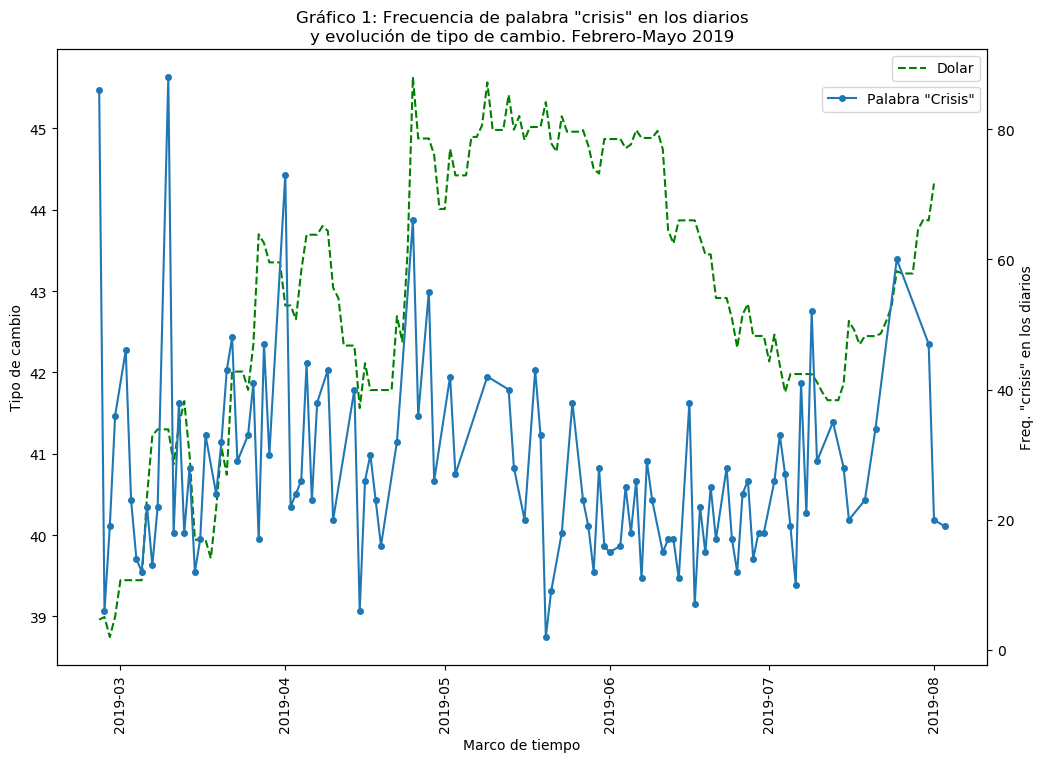

In [86]:
plt.style.use('default')
plt.figure(figsize=(12,8))
plt.title('Gráfico 1: Frecuencia de palabra "crisis" en los diarios\ny evolución de tipo de cambio. Febrero-Mayo 2019')
plt.plot_date(dolar_slice.index, dolar_slice['tipo_cambio_a3500'], 'go--', markersize=0, label='Dolar')
plt.xlabel('Marco de tiempo')
plt.ylabel('Tipo de cambio')
plt.xticks(rotation=90)
plt.legend(['Dolar'])
plt.twinx()
plt.plot_date(ct_slice.index, ct_slice['crisis cuenta'], 'go-', markersize=4, color='#1f77b4', label='Palabra "Crisis"')
plt.ylabel('Freq. "crisis" en los diarios')
plt.xticks(rotation=90)
plt.legend(['Palabra "Crisis"'], bbox_to_anchor=(0.5, 0.45, 0.5, 0.5))
#plt.savefig('freq crisis dolar', dpi=300, bbox_inches ='tight')
plt.show()

##### La primera fecha en la que comienza nuestro análisis es a partir del 25-02-2019, y se observa un pico alto de la frecuencia de “crisis” en los diarios. Esto se puede comprender a partir de la evolución misma que traía el dólar, donde después de unos meses de relativa estabilidad rondando entre los 37 y 38 pesos, el dólar se dispara a 40 pesos, cerca de nuevo “máximo histórico” según una publicación de Infobae, para luego comenzar a fluctuar entre 40 y 45 pesos. En el siguiente gráfico 2, observamos la relativa estabilidad y la escalada hacia finales de febrero de 2019.
##### Encontramos que la frecuencia de la palabra da saltos siguiendo las modificaciones de la divisa norteamericana, y aunque la relación es débil, siendo el coeficiente de correlación de Spearman para estas dos variables de 0,34, podemos sostener que existe una relación entre las variables variación del dólar y frecuencia de la palabra crisis (p-valor de 0,012) (scipy.stats.spearmanr()). No obstante, se debe mencionar que esta correlación es baja, debido a que no se podrían esperar relaciones mecánicas entre ambas variables, ya que la utilización de la palabra crisis depende, pensamos, de la percepción de los autores de las notas periodísticas. En este sentido, hay mayor y menor frecuencia de utilización, como se ve en el gráfico 1, donde, cuando el dólar se dispara, se dispara el uso de la palabra, aunque decae posteriormente incluso cuando el tipo de cambio forma una “meseta” o también decaiga: ¿será esto un acostumbramiento del discurso a las condiciones económicas? En el diagrama de dispersión, observamos la forma que toma la relación entre los datos.

In [87]:
tabla_dolar_crisis_nona = tabla_dolar_crisis.dropna()
stats.spearmanr(tabla_dolar_crisis_nona['tipo de cambio'], tabla_dolar_crisis_nona['crisis'])

SpearmanrResult(correlation=0.018125292880951268, pvalue=0.8516078481574076)

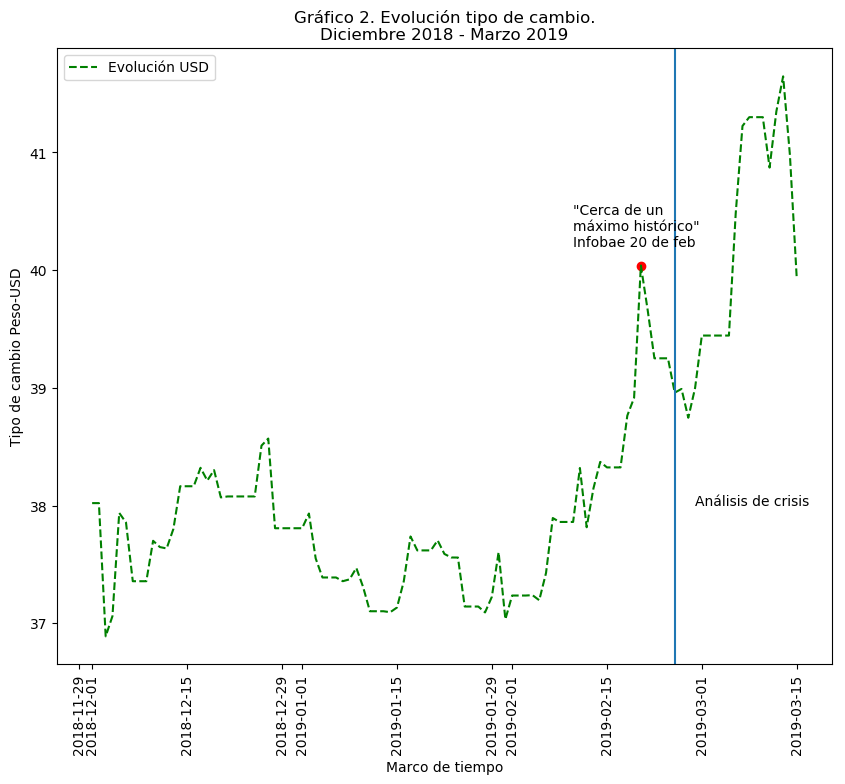

In [88]:
plt.figure(figsize=(10,8))
plt.title('Gráfico 2. Evolución tipo de cambio.\nDiciembre 2018 - Marzo 2019')
plt.plot_date(dolar_tc_dic_mar.index, dolar_tc_dic_mar['tipo_cambio_a3500'], 'go--', markersize=0, label='Evolución USD')
plt.ylabel('Tipo de cambio Peso-USD')
plt.xlabel('Marco de tiempo')
plt.axvline(['2019-02-25'], color='#1f77b4')
plt.annotate('Análisis de crisis', ['2019-02-28', 38])
plt.xticks(rotation=90)
plt.scatter('2019-02-20', 40.0400, color='red')
plt.annotate('"Cerca de un\nmáximo histórico"\nInfobae 20 de feb', ['2019-02-10',40.2000] )
plt.legend()
#plt.savefig('evolucion usd dic mar.png', dpi=300, bbox_inches ='tight')
plt.show()

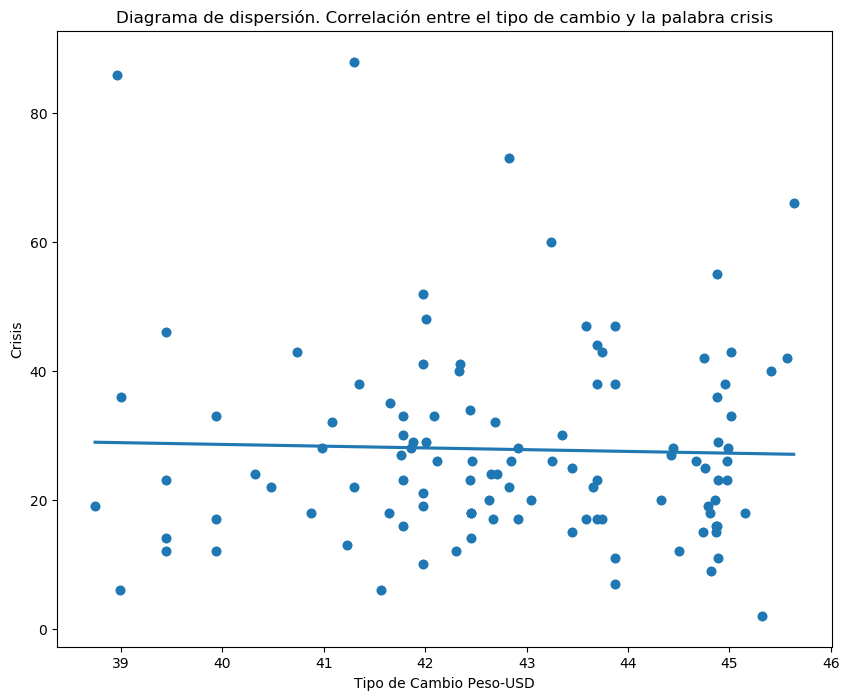

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(tabla_dolar_crisis['tipo de cambio'], tabla_dolar_crisis['crisis'])
plt.title('Diagrama de dispersión. Correlación entre el tipo de cambio y la palabra crisis')
sns.regplot(x=tabla_dolar_crisis['tipo de cambio'], y=tabla_dolar_crisis['crisis'], ci=None, truncate=True)
plt.ylabel('Crisis')
plt.xlabel('Tipo de Cambio Peso-USD')
#plt.savefig('correlación dolar-crisis.png', dpi=300, bbox_inches ='tight')
plt.show()

In [90]:
tabla_dolar_crisisna = tabla_dolar_crisis.dropna()

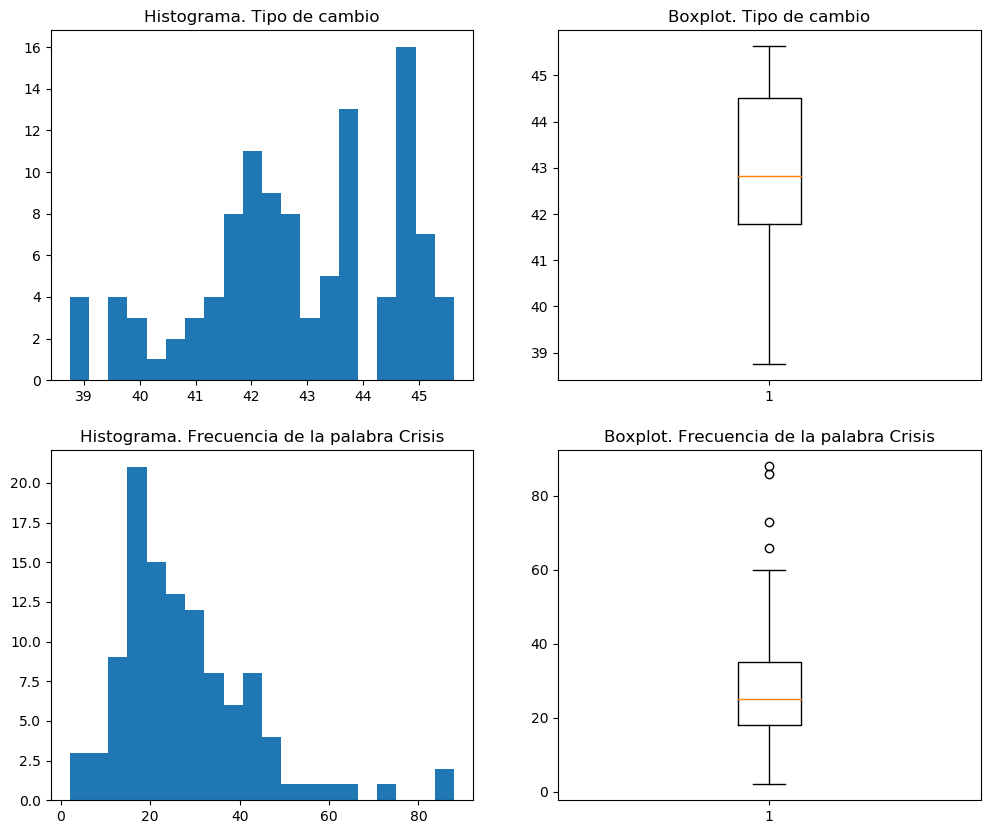

In [93]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Histograma. Tipo de cambio')
plt.hist(tabla_dolar_crisisna['tipo de cambio'], bins=20)
plt.subplot(2,2,2)
plt.title('Boxplot. Tipo de cambio')
plt.boxplot(tabla_dolar_crisisna['tipo de cambio'])
plt.subplot(2,2,3)
plt.title('Histograma. Frecuencia de la palabra Crisis')
plt.hist(tabla_dolar_crisisna['crisis'], bins=20)
plt.subplot(2,2,4)
plt.title('Boxplot. Frecuencia de la palabra Crisis')
plt.boxplot(tabla_dolar_crisisna['crisis'])
plt.show()

In [92]:
sixties = tabla_dolar_crisisna[tabla_dolar_crisisna['crisis']>=60].index

In [72]:
tabla_dolar_crisisna[tabla_dolar_crisisna['crisis']>=60].index[0]

Timestamp('2019-02-25 00:00:00')

In [73]:
sixties[0]

Timestamp('2019-02-25 00:00:00')

In [74]:
tabla_dolar_crisis_no_outl = tabla_dolar_crisisna.drop([sixties[0]]).drop(sixties[1]).drop(sixties[2])

In [94]:
dolar_array_0 = np.array(tabla_dolar_crisisna.iloc[:, 0])
dolar_array_1 = np.array(tabla_dolar_crisisna.iloc[:, 1])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ro = stats.spearmanr(tabla_dolar_crisis_no_outl['tipo de cambio'], tabla_dolar_crisis_no_outl['crisis'])[0]
dolar_su = scaler.fit_transform(np.vstack((dolar_array_0, dolar_array_1)).T)
a = ro*np.std(tabla_dolar_crisis_no_outl.iloc[:, 0])/np.std(tabla_dolar_crisis_no_outl.iloc[:, 1])
b = np.mean(tabla_dolar_crisis_no_outl.iloc[:, 1] - a * np.mean(tabla_dolar_crisis_no_outl.iloc[:, 0]))
fitted = a*tabla_dolar_crisis_no_outl.iloc[:, 0] + b
residuals = tabla_dolar_crisis_no_outl.iloc[:, 1] - fitted
tabla_dolar_crisis_no_outl['residuals'] = residuals
tabla_dolar_crisis_no_outl['fitted'] = fitted
fitted_res = scaler.fit_transform(np.vstack((np.array(tabla_dolar_crisis_no_outl['residuals']), np.array(tabla_dolar_crisis_no_outl['fitted']))).T)

In [96]:
ro

0.47425418880261544

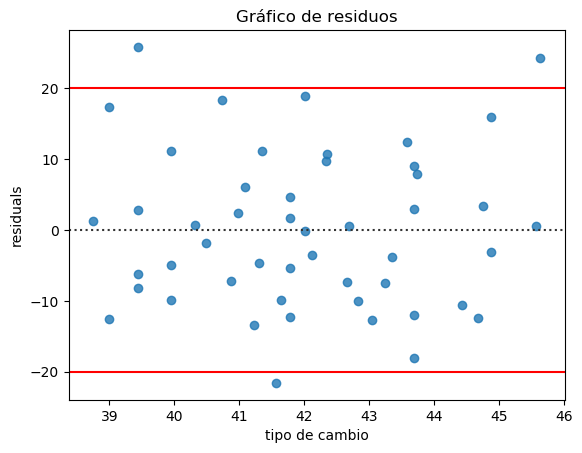

In [97]:
plt.title('Gráfico de residuos')
sns.residplot(tabla_dolar_crisis_no_outl['tipo de cambio'], tabla_dolar_crisis_no_outl['residuals'])
plt.axhline(20, color='red')
plt.axhline(-20, color='red')
plt.show()

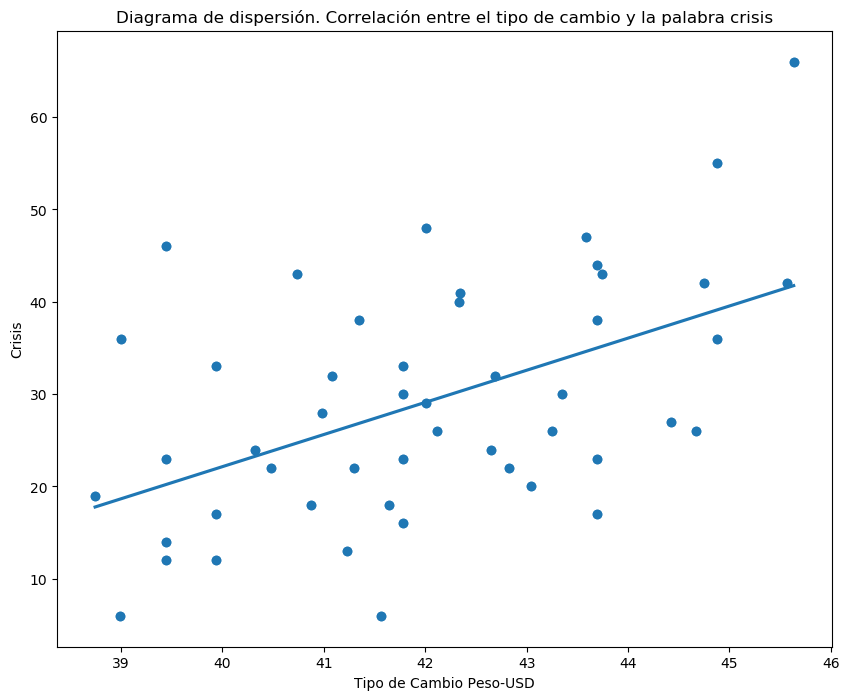

In [98]:
plt.figure(figsize=(10,8))
plt.scatter(tabla_dolar_crisis_no_outl['tipo de cambio'], tabla_dolar_crisis_no_outl['crisis'])
plt.title('Diagrama de dispersión. Correlación entre el tipo de cambio y la palabra crisis')
sns.regplot(x=tabla_dolar_crisis_no_outl['tipo de cambio'], y=tabla_dolar_crisis_no_outl['crisis'], ci=None, truncate=True)
plt.ylabel('Crisis')
plt.xlabel('Tipo de Cambio Peso-USD')
#plt.savefig('correlación dolar-crisis.png', dpi=300, bbox_inches ='tight')
plt.show()

In [99]:
ro = stats.spearmanr(tabla_dolar_crisis_nona['tipo de cambio'], tabla_dolar_crisis_nona['crisis'])[0]

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dolar_su = scaler.fit_transform(np.vstack((dolar_array_0, dolar_array_1)).T)
a = ro*np.std(tabla_dolar_crisisna.iloc[:, 0])/np.std(tabla_dolar_crisisna.iloc[:, 1])
b = np.mean(tabla_dolar_crisisna.iloc[:, 1] - a * np.mean(tabla_dolar_crisisna.iloc[:, 0]))
fitted = a*tabla_dolar_crisisna.iloc[:, 0] + b
residuals = tabla_dolar_crisisna.iloc[:, 1] - fitted
tabla_dolar_crisisna['residuals'] = residuals
tabla_dolar_crisisna['fitted'] = fitted
fitted_res = scaler.fit_transform(np.vstack((np.array(tabla_dolar_crisisna['residuals']), np.array(tabla_dolar_crisisna['fitted']))).T)

In [101]:
tabla_dolar_crisisna['dolar su'] = dolar_su[:,0]

In [102]:
tabla_dolar_crisisna['crisis su'] = dolar_su[:,1]

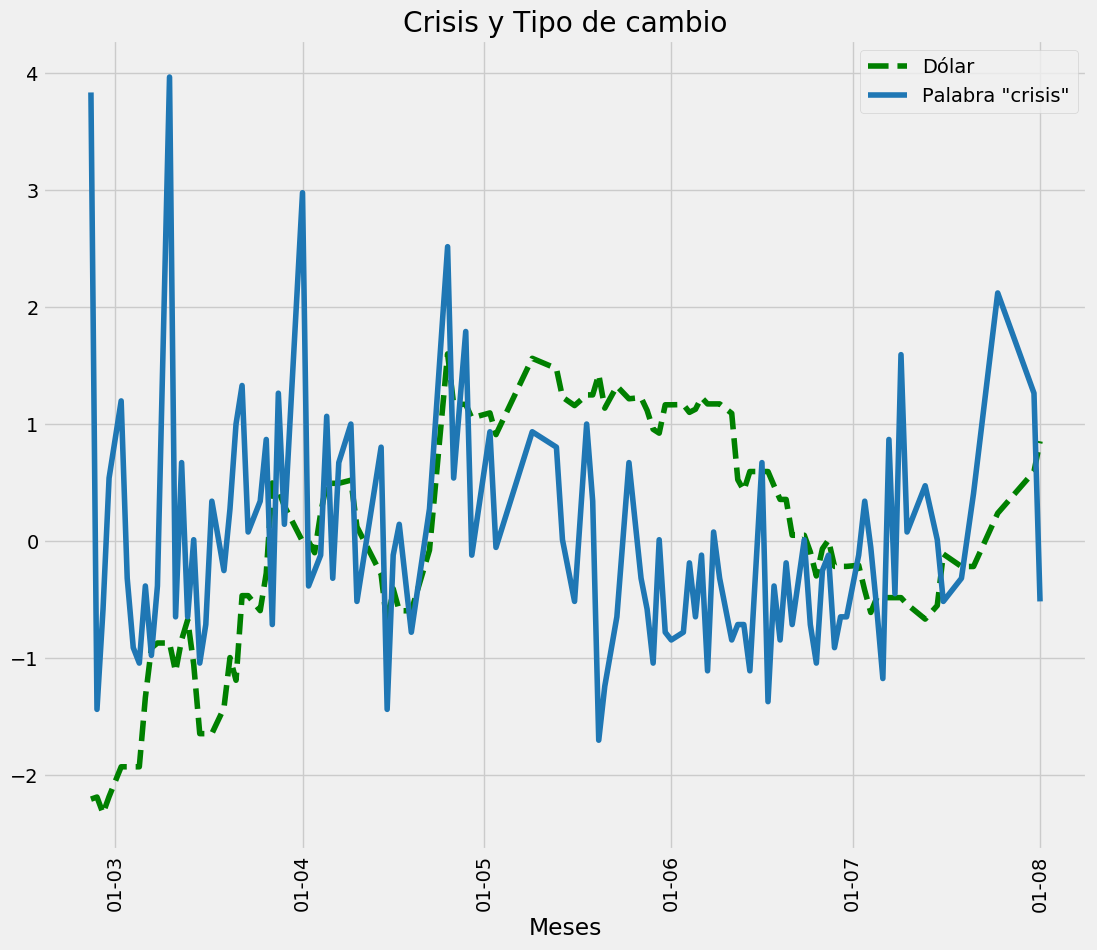

In [103]:
from matplotlib.dates import DateFormatter
myFmt = DateFormatter("%d-%m")
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize=(12,10))
plt.title('Crisis y Tipo de cambio')
plt.plot_date(tabla_dolar_crisisna.index, tabla_dolar_crisisna['dolar su'], 'go--', markersize=0, label='Dólar')
plt.plot_date(tabla_dolar_crisisna.index, tabla_dolar_crisisna['crisis su'], 'go-', markersize=0, color='#1f77b4', label='Palabra "crisis"')
plt.xlabel('Meses')
plt.legend()
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(myFmt)
plt.savefig('crisis y tipo de cambio.png', dpi=300, bbox_inches ='tight')

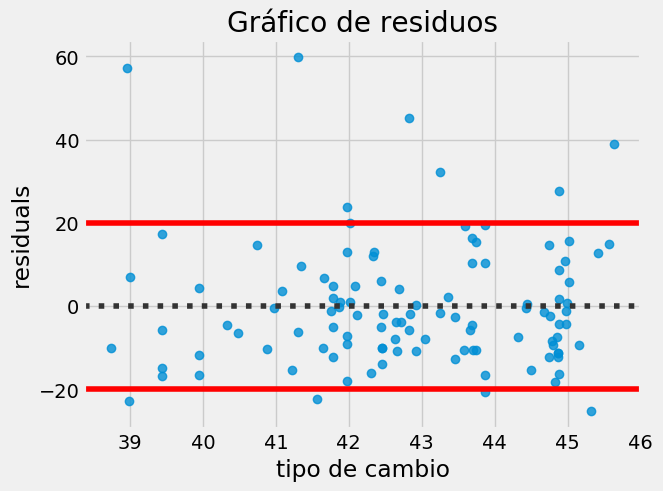

In [104]:
plt.title('Gráfico de residuos')
sns.residplot(tabla_dolar_crisisna['tipo de cambio'], tabla_dolar_crisisna['residuals'])
plt.axhline(20, color='red')
plt.axhline(-20, color='red')
plt.show()

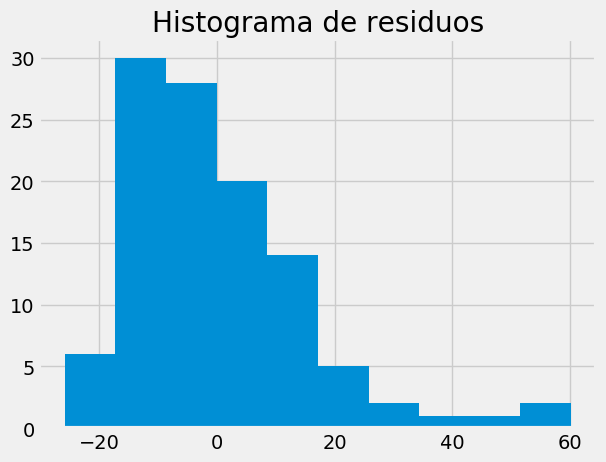

In [105]:
plt.title('Histograma de residuos')
plt.hist(tabla_dolar_crisisna['residuals'])
plt.show()

##### Vemos en los histogramas y boxplots los outliers de la variable "crisis" que hacen asimétrica a la distribución, pero además los encontramos en el gráfico de residuos. Si bien los errores están dispersos aleatoriamente en este último, la varianza de los errores -que no es constante y que nos da heterocedasticidad- nos muestra que no se podría "predecir" con estas variables. ¡Y simplemente debemos aceptarlo! A esto lo señalamos cuando decimos que no hay una relación mecánica y que la utilización de la palabra depende de la percepción del periodista. De todas maneras, la correlación es débil, pero existe.

In [106]:
#infobae_20_feb('https://www.infobae.com/economia/2019/02/20/el-dolar-se-aproxima-a-41-pesos-y-le-apunta-a-un-nuevo-maximo-historico/')

##### En conclusión, existe una relación entre los datos, crisis y tipo de cambio, que nos da la posibilidad de señalar la no independencia de las variables y descartar sin temor a equivocarnos la hipótesis nula. Habiendo observado la relación de la palabra crisis con el contexto, pasamos a continuación a analizarla internamente en el ámbito de los medios gráficos en los cuales ésta aparece.
### Crisis en los textos de los medios gráficos
##### Las relaciones entre la mención de la palabra crisis en los medios gráficos cambia según la empresa y la sección. Encontramos que según el medio habrá más mención de esta palabra en la sección de política o economía. En el siguiente gráfico de barras (ver abajo) se muestran estas relaciones, donde los díarios Página|12, Pausa e Iprofesional mencionaron con mayor frecuencia la palabra crisis en las secciones de economía, mientras que Clarín, La Nación e Infobae la mencionaron más en las secciones de política. Aunque podría pensarse que esto es una simple casualidad, a través del test de Chi Cuadrado rechazamos la Hipótesis Nula (que la distribución de estas frecuencias responden a la casualidad y no a tienen relación con los diarios) al obtener un estadístico de 83,34 a través de la tabla 1, con 5 grados de libertad. Este estadístico es superior al de Chi Cuadrado por tabla, valor de 11,07 para el p valor de 0,05 con 5 grados de libertad. En este sentido, sin correr riesgos podemos rechazar la hipótesis nula y sostener la hipótesis alternativa, la cual enuncia que la diferencia de frecuencias de la palabra crisis en una u otra sección (política y economía) responde a una cuestión estructural de los medios de comunicación gráficos que ponemos aquí bajo estudio.


In [107]:
#dolar_tc.drop(dolar_tc.columns[0], axis=1, inplace=True)
#dolar_tc.drop(dolar_tc.columns[1], axis=1, inplace=True)

In [108]:
crisis_count_v2 = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\crisis count v2.csv', sep=';')
crisis_count_v2.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
crisis_count_v2['eco fq teorica/esperada'] = ((crisis_count_v2['economia crisis'].sum()*crisis_count_v2['articulos crisis'])/crisis_count_v2['articulos crisis'].sum())
crisis_count_v2['pol fq teorica/esperada'] = ((crisis_count_v2['politica crisis'].sum()*crisis_count_v2['articulos crisis'])/crisis_count_v2['articulos crisis'].sum())

#Grado de libertad: número de filas - 1 * número de columnas -1

#Grados de libertad para x^2
print('Grados de libertad:', (crisis_count_v2.shape[0] - 1)*(2-1))

suma_chi_ec_pol = []
for i in range(len(crisis_count_v2)):
    chi_ec = ((crisis_count_v2['economia crisis'][i] - crisis_count_v2['eco fq teorica/esperada'][i])**2)/crisis_count_v2['eco fq teorica/esperada'][i]
    chi_pol = ((crisis_count_v2['politica crisis'][i] - crisis_count_v2['pol fq teorica/esperada'][i])**2)/crisis_count_v2['pol fq teorica/esperada'][i]
    suma_chi_ec_pol.append(chi_ec+chi_pol)

print('Estadístico X^2:', np.sum(suma_chi_ec_pol))

Grados de libertad: 5
Estadístico X^2: 83.34048380745124


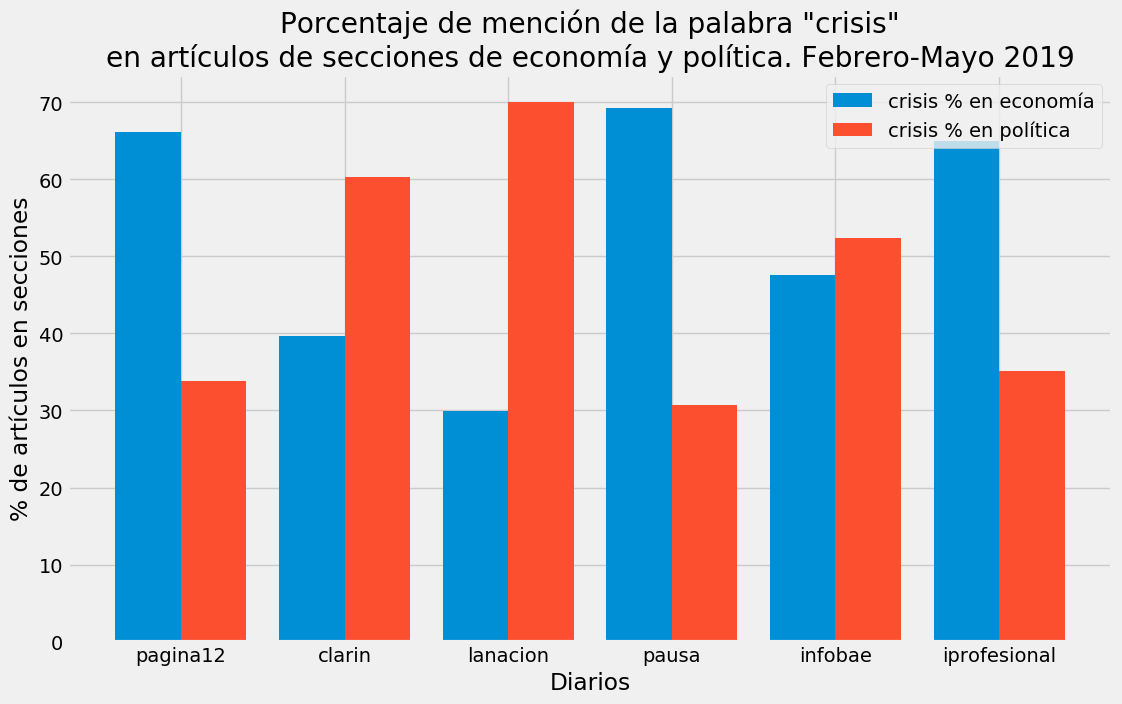

In [110]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
plt.title('Porcentaje de mención de la palabra "crisis"\nen artículos de secciones de economía y política. Febrero-Mayo 2019')
ind = np.arange(0, len(crisis_count_v2)*2, 2)
width = 0.8
plt.bar(ind, crisis_count_v2['economia % articulos'], label='crisis % en economía')
plt.bar(ind + width, crisis_count_v2['politica % articulos'], label='crisis % en política')
plt.ylabel('% de artículos en secciones')
plt.xlabel('Diarios')
plt.xticks(ind + width / 2,  crisis_count_v2['diario'])
plt.legend()
plt.savefig('porcentaje crisis secciones.png', dpi=300, bbox_inches ='tight')
plt.show()

In [111]:
crisis_count_v2

,diario,articulos crisis,economia crisis,politica crisis,crisis count,crisis relativa,economia % articulos,politica % articulos,eco fq teorica/esperada,pol fq teorica/esperada
0,pagina12,251,166,85,402,1.60,66.14,33.86,124.811700,126.188300
1,clarin,224,89,135,322,1.44,39.73,60.27,111.385740,112.614260
2,lanacion,194,58,136,289,1.49,29.90,70.10,96.468007,97.531993
3,pausa,26,18,8,42,1.62,69.23,30.77,12.928702,13.071298
4,infobae,265,126,139,416,1.57,47.55,52.45,131.773309,133.226691
5,iprofesional,134,87,47,203,1.51,64.93,35.07,66.632541,67.367459


### Las palabras de la crisis
##### En el análisis con APAlala(), la frecuencia de la palabra crisis se obtiene del conteo de la misma, presente en los textos de los artículos de los diarios. APAlala() opera una segmentación de los textos, extrayendo las oraciones en las que aparece la palabra buscada. El objetivo de dicha segmentación es acceder a las palabras que están en el mismo enunciado del elemento buscado, y aunque esto supone ignorar los múltiples señalamientos a través de la deixis de los textos, captar la deixis supondría un código de procesamiento de lenguaje natural mucho más complejo. Advertidos de esto, sabemos que APAlala() propone un análisis cuantitativo de los textos, razón por la cual hemos extraído y contado las palabras que se presentan en las oraciones en las que también aparece la palabra crisis. Proponemos abordar así las primeras 20 palabras con mayor frecuencia, las cuales fueron filtradas a través del proceso de stop-words y obtenidas a través del bag of words.


In [112]:
lista_palabras_crisisdiarios

,Pausa,Clarín,Página|12,La Nación,Infobae,Iprofesional
0,"(crisis, 63)","(crisis, 562)","(crisis, 799)","(crisis, 508)","(crisis, 780)","(crisis, 336)"
1,"(cambiemos, 7)","(económica, 99)","(económica, 148)","(económica, 105)","(económica, 125)","(país, 47)"
2,"(2018, 7)","(año, 67)","(gobierno, 108)","(gobierno, 76)","(argentina, 105)","(económica, 47)"
3,"(2009, 7)","(gobierno, 66)","(año, 74)","(año, 59)","(gobierno, 82)","(argentina, 44)"
4,"(cifras, 7)","(argentina, 62)","(país, 69)","(macri, 53)","(país, 79)","(gobierno, 41)"
5,"(año, 7)","(macri, 48)","(macri, 64)","(país, 51)","(año, 76)","(año, 37)"
6,"(diciembre, 6)","(años, 45)","(sector, 58)","(presidente, 47)","(medio, 64)","(pasado, 36)"
7,"(sector, 6)","(país, 41)","(argentina, 57)","(argentina, 45)","(macri, 61)","(años, 30)"
8,"(económica, 6)","(cambiaria, 41)","(caída, 55)","(pasado, 38)","(venezuela, 58)","(macri, 25)"
9,"(trabajo, 5)","(sector, 40)","(economía, 53)","(economía, 33)","(situación, 56)","(2018, 23)"


##### En la tabla se percibe el mundo ethico, según el concepto de Maingueneau que enuncia el «comportamiento que, en tanto tal, articula lo verbal y lo no verbal para provocar en el destinatario efectos que no se deben solo a las palabras» (Maingueneau, 2002:3). En este sentido, estaríamos observando aquí las palabras con mayor frecuencia en estos mundos ethicos de los medios gráficos, los cuales, en la estructura conceptual de Maingueneau, vendrían a ser los garantes de esos mundos ethicos. Así, si comparamos estas listas de palabras que se ordenan según la frecuencia con la que aparecen en los textos, veremos similitudes y diferencias, como por ejemplo el Periódico Pausa, que se destaca por realizar otro “juego de palabras” ya que el resto de los medios gráficos mencionan con mucha frecuencia casi las mismas palabras. Esto nos habla de una estructura del discurso hacia donde remiten estos medios, dirigidas a sus respectivos auditorios con sus representaciones sociales asociadas. Por ejemplo, entre las palabras que pueden ser destacadas por tener un sentido dirigido hacia esos auditorios, Pausa menciona “trabajo”, “industrial”, “cifras” y “peor”; Página|12 también remite a la palabra “trabajo”, aunque las diecinueve palabras previas señalan cuestiones generales como el gobierno, lo financiero, la economía, el presidente, la inflación y las empresas, como así también lo hacen Clarín y La Nación, con la diferencia que Página|12 también menciona con mucha frecuencia la palabra “caída”. La Nación también habla de “recesión” y “fondo” ¬–intepretamos, por Fondo Monetario Internacional–. Situación similar se encuentra en Infobae, aunque llama notablemente la atención la frecuencia con la que aparece la palabra Venezuela, en notas no internacionales, y sí aparece la palabra “dólar”. Por su parte, Iprofesional también menciona con frecuencia las palabras que encontramos en los medios gráficos anteriores a excepción del periódico Pausa. 

##### No obstante, el hecho de contar el número de veces en que aparecen las palabras, si bien nos da una pauta de la utilización de las mismas según su frecuencia absoluta, necesitamos saber algo de su frecuencia relativa en referencia a todos los documentos que utilizamos aquí. A esto lo conseguimos vectorizando las palabras del corpus para cada periódico, y posteriormente representarlas en un diagrama de dispersión a través de la reducción de dimensionalidad operada por t-SNE. En el diagrama es posible medir la distancia entre los puntos, de modo que podamos señalar similitudes entre los mismos. Además, estas similitudes para cada diario funcionan como similitudes entre los diarios. De esta manera, mayor o menor distancia entre las mismas palabras de un diario a otro suponen características de esos diarios, evidentemente por la utilización que hacen de esas palabras.
##### Y por la utilización que hacen de las palabras y los conceptos, y en referencia a los "mundos ethicos" que movilizan es que podemos medir la distancia entre dos palabras que se muestran en las listas de frecuencias absolutas: crisis relacionado a gobierno. ¿Es la "crisis" -que como vimos, su frecuencia está correlacionada a la variación del dolar- cercana al "gobierno"? No podemos obtener esta respuesta directamente en la forma de que si el gobierno nacional es culpable o no de la crisis, sino que a partir de los documentos podremos medir con qué intensidad los diarios relacionan estas dos palabras en una misma oración. Esto hace referencia a los mundos ethicos, el gobierno puede tener mayor, menor o ninguna injerencia en la crisis ofreciendo la representación de que o bien este tiene que trabajar en ella, o bien ella es causa de este o por otro lado, la crisis está relacionada a otra entidad con la cual el gobierno no tiene ninguna responsabilidad. Así, si a través de las frecuencias absolutas consideraríamos que ambas palabras son cercanas, midiendo sus distancias euclideanas de medio gráfico a medio gráfico, mediríamos aquella intensidad que mencionamos apenas más arriba.
##### Las siguientes distancias están medidas en standard units:

In [113]:
crisis_pausa = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis pausa.csv', sep=';')
crisis_clarin = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis clarin.csv', sep=';')
crisis_lanacion = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis lanacion.csv', sep=';')
crisis_infobae = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis infobae.csv', sep=';')
crisis_p12 = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis p12.csv', sep=';')
crisis_iprof = pd.read_csv(r'C:\Users\Mauricio\Documents\jupyter\letra chica\diarios slice\crisis iprof.csv', sep=';')

#### Obtnemos entonces las consiguientes distancias euclideanas:

In [114]:
distancia_palabras(crisis_p12['oracion'], crisis_p12['diario'], p_buscada='crisis', dist_center=0.2, rela_p='gobierno', perplexity=50, su=True, euclidean=True, graf=False)

Palabra buscada: crisis [-0.06766807, -0.029070409] 
Palabra relacionada: gobierno [-0.33632413, 0.66476524] 
Distancia euclideana: crisis ~ gobierno 0.7440322677938774


In [115]:
distancia_palabras(crisis_iprof['oracion'], crisis_iprof['diario'], p_buscada='crisis', rela_p='gobierno', dist_center=0.2, perplexity=50, su=True, euclidean=True, graf=False)

Palabra buscada: crisis [0.72801435, 0.20521027] 
Palabra relacionada: gobierno [2.005608, 0.30050385] 
Distancia euclideana: crisis ~ gobierno 1.281142697130935


In [116]:
distancia_palabras(crisis_lanacion['oracion'], crisis_lanacion['diario'], p_buscada='crisis', rela_p='gobierno', dist_center=0.2, perplexity=50, su=True, euclidean=True, graf=False)

Palabra buscada: crisis [-0.09151728, -0.045428388] 
Palabra relacionada: gobierno [0.92168766, -0.98524016] 
Distancia euclideana: crisis ~ gobierno 1.3819661321645698


In [117]:
distancia_palabras(crisis_pausa['oracion'], crisis_pausa['diario'],p_buscada='crisis', rela_p='gobierno', dist_center=0.5, perplexity=50, euclidean=True, su=True, graf=False)

Palabra buscada: crisis [-0.36942568, 0.2509146] 
Palabra relacionada: gobierno [1.0668354, 0.28565624] 
Distancia euclideana: crisis ~ gobierno 1.4366811782240465


In [118]:
distancia_palabras(crisis_clarin['oracion'], crisis_clarin['oracion'], p_buscada='crisis', rela_p='gobierno', dist_center=0.2, perplexity=50, su=True, euclidean=True, graf=False)

Palabra buscada: crisis [0.11265011, 0.02493811] 
Palabra relacionada: gobierno [-2.3673186, 0.7291368] 
Distancia euclideana: crisis ~ gobierno 2.578011058016558


In [119]:
distancia_palabras(crisis_infobae['oracion'], crisis_infobae['diario'], p_buscada='crisis', rela_p='gobierno', dist_center=0.5, perplexity=50, su=True, euclidean=True, graf=False)

Palabra buscada: crisis [-0.2155838, -2.4348116] 
Palabra relacionada: gobierno [1.2624083, -0.2594022] 
Distancia euclideana: crisis ~ gobierno 2.6299935778407106


##### Encontramos que tanto Infobae como Clarín sitúan las dos palabras muy lejos una de otra, mientras que Página|12 las sitúa más cerca. En un nivel intermedio encontramos a Periódico Pausa, La Nación e Iprofesional (en ese orden de mayor a menor distancia). Aunque para Periódico Pausa no encontramos dentro de la lista de 20 palabras más mencionadas, la palabra "gobierno", sino "cambiemos", precisamente el partido gobernante. Con todo derecho podemos preguntarnos a qué distancia se encuentra esta palabra de la palabra "crisis".  

In [ ]:
distancia_palabras(crisis_pausa['oracion'], crisis_pausa['diario'],p_buscada='crisis', rela_p='cambiemos', dist_center=0.5, perplexity=50, euclidean=True, su=True, graf=False)

##### Con una diferencia de 0.2 aproximadamente entre las palabras "cambiemos" y "gobierno", Pausa seguiría ocupando el mismo lugar.
##### Con todo, la distancia entre las palabras nos sirve para señalar la intensidad con que cada diario asocia crisis a gobierno, mientras que las frecuencias absolutas nos sirven para delimitar los mundos ethicos que construyen los medios en pos de dirigirse a un auditorio imaginario. Debemos señalar aquí el mundo ethico de Pausa, el cual, estando compuesto por actores sociales relacionados al mundo universitario, es sensiblemente diferente del resto de los diarios analizados, utilizando otras palabras para explicar y analizar o comunicar los mismos fenómenos, a fin de cuentas para dirigir sus artículos a un auditorio específico. De esta forma, los demás diarios, puesto que sus listas de palabras más mencionadas son "similares", parecerían disputarse los auditorios dentro un único gran auditorio o comunidad discursiva operando no obstante diferentes enunciados -medidos por la distancia de las palabras- a partir de un lenguaje común.

## Conclusión
##### La mayor parte de estos periódicos que estudiamos aquí –Clarín, La Nación, Infobae e Iprofesional–, en lo que respecta a la cuestión interna o discursiva en relación a la palabra crisis, evocan con mayor frecuencia palabras que remiten a conceptos abstractos o generales, como la nación, el gobierno, a diferencia de Pausa que señala un mundo ethico muy diferente y más concreto. Por otro lado, hay diferencias entre estos medios gráficos a la hora de hacer uso de la palabra crisis, según su escena genérica, en este caso, la sección del diario. Según los diarios, hay más frecuencia de la palabra en economía o en política, siendo esta distribución de las frecuencias no una mera casualidad, sino que, como mostramos a través de la distribución chi cuadrado, se puede desestimar la hipótesis nula y sostener que existe un por qué ciertos diarios la utilizan más o menos en una u otra sección. Por último, de estas mencionadas cuestiones internas, nos vamos a las externas. También mostramos a través de la correlación de Spearman, una correlación –si bien no muy fuerte– entre la evolución del tipo de cambio y la evolución de la frecuencia de la palabra en los medios gráficos. Por lo que existe una influencia del contexto que repercute, en conjunto, en las redacciones las cuales reaccionan de diferente manera: mencionando la palabra ya sea más en secciones de economía, ya sea más en secciones de política.
##### Con todo, a través de APAlala(), se construyó un corpus que puede ser pasible de estudio cualitativo a través del análisis del discurso, para abordar las marcas deícticas y el mundo ethico más en profundidad, en los aspectos que una metodología cuantitativa no aborda.

### Bibliografía:
##### Maingueneau, Dominique (2002). “Problèmes d’ethos”, en Pratiques N º113/114, Junio de 2002, pp. 55-67. (Traducido y seleccionado por M. Eugenia Contursi)
